In [ ]:
mongodb_uri ='mongodb://localhost:27017/'
port = 8000
client = MongoClient(mongodb_uri,port)

db = client["newdatabase"]

app = FastAPI()

class User(BaseModel):
    name: str
    tasks: dict

@app.post('/users')
async def create_user(name: str):
    db.users.insert_one({'name': name, 'tasks': {}})
    return {"message": f"user {name} created successfully"}

class Task(BaseModel):
    user_id: str
    task: str
    status: bool

@app.post('/tasks')
async def create_task(user_id: str, task: str, status: bool):
    user = db.users.find_one({'_id': ObjectId(user_id)})
    if not user:
        return {"message": f"user does not exist"}
    tasks = user.get('tasks', {})
    print(tasks)
    if task in tasks:
        return {"message": f"task {task} already exists"}
    tasks[task] = status
    print(tasks)
    db.users.update_one({'_id': ObjectId(user_id)}, {'$set': {'tasks': tasks}})
    return {"message": f"task {task} created successfully"}

def fetch_tasks(user_id: str):
    user = db.users.find_one({'_id': ObjectId(user_id)})
    if user:
        user['_id'] = str(user['_id'])
        return user
    raise HTTPException(status_code=404, detail="User not found")

@app.get('/tasks')
async def get_tasks(user_id: str):
    return fetch_tasks(user_id)

@app.put('/tasks/{task}')
async def update_task(user_id: str, task: str, status: bool):
    user = db.users.find_one({'_id': ObjectId(user_id)})
    if not user:
        return {"message": f"user does not exist"}
    tasks = user.get('tasks', {})
    if task not in tasks:
        return {"message": f"task {task} does not exist"}
    tasks[task] = status
    db.users.update_one({'_id': ObjectId(user_id)}, {'$set': {'tasks': tasks}})
    return {"message": f"task {task} updated successfully"}

## Usingdeepface to extract Face and make face embeddings

### db schema
- face img
- id
- name (optional)
- age
- gender
- synthetic attributes(to be generated in future for further research)



In [3]:
from deepface import DeepFace

image_path = "Images\devansh.jpg"
extracted_face = DeepFace.extract_faces(image_path, detector_backend = 'mtcnn')


1/1 [==============================] - 0s 193ms/step


In [10]:
extracted_face

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

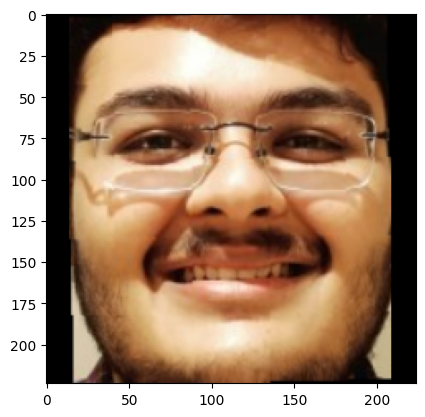

In [12]:
from matplotlib import pyplot as plt
plt.imshow(extracted_face[0]['face'])


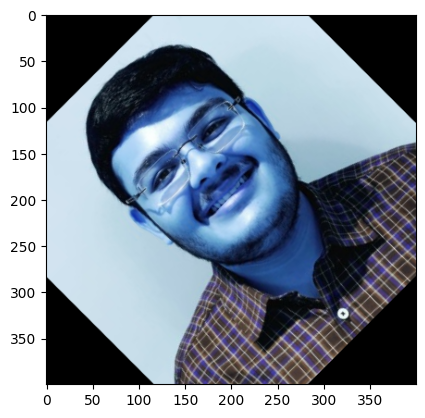

In [21]:
# give rotated image by 45 degree's as input
import cv2
img = cv2.imread(image_path)
(h, w) = img.shape[:2]
center = (w / 2, h / 2)
angle45 = 45
scale = 1.0
M = cv2.getRotationMatrix2D(center, angle45, scale)
rotated45 = cv2.warpAffine(img, M, (h, w))
plt.imshow(rotated45)


retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: C:\Users\Devasy\.deepface\weights\retinaface.h5
100%|██████████| 119M/119M [00:12<00:00, 9.16MB/s] 


0.9999157190322876


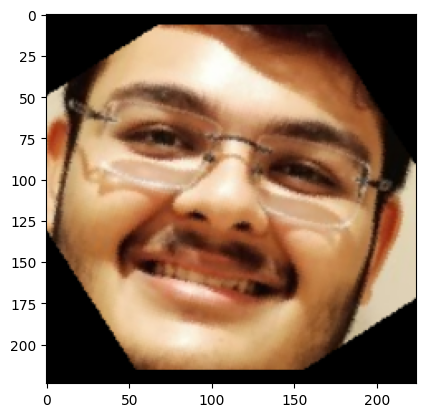

In [27]:
new_extracted_face = DeepFace.extract_faces(rotated45, detector_backend = 'retinaface')
print(new_extracted_face[0]['confidence'])
plt.imshow(new_extracted_face[0]['face'])

In [30]:
# embedding of extracted face
embedding = DeepFace.represent(rotated45, model_name = 'Facenet', detector_backend='retinaface')
embedding

[{'embedding': [-0.7613316774368286,
   0.7168868780136108,
   1.1391221284866333,
   0.0870029553771019,
   0.7235468029975891,
   -0.284409761428833,
   0.7022044658660889,
   -2.628713607788086,
   -0.8989149332046509,
   2.093172788619995,
   0.3535653054714203,
   -0.48013657331466675,
   -1.424012303352356,
   -1.462817907333374,
   -0.036128103733062744,
   1.4304324388504028,
   0.6999751329421997,
   -0.6086507439613342,
   -1.633750319480896,
   -1.6507925987243652,
   0.33205267786979675,
   -0.3876064121723175,
   -0.5627342462539673,
   -0.0436604768037796,
   -0.13403232395648956,
   0.2467590570449829,
   0.7091976404190063,
   0.7795525193214417,
   -1.0776993036270142,
   2.2203445434570312,
   0.5673094987869263,
   -0.6411224007606506,
   -1.9194210767745972,
   -0.14063020050525665,
   2.123344898223877,
   0.5725311040878296,
   -0.24147754907608032,
   0.11860524863004684,
   2.536914348602295,
   1.464136004447937,
   -0.3658997118473053,
   -0.7906534671783447,


In [34]:
import time

def log_time(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print(f"Time taken: {end-start} by {func.__name__} {args[2]}")
    return wrapper

@log_time
def test(img, model_name, detector_backend):
    embedding = DeepFace.represent(img, model_name = model_name, detector_backend=detector_backend)
    return embedding

test(rotated45, 'Facenet', 'retinaface')
test(rotated45, 'Facenet', 'mtcnn')

Time taken: 2.467024326324463 by test retinaface
1/1 [==============================] - 0s 83ms/step
Time taken: 1.8496372699737549 by test mtcnn


## store it in db